# Flight Price Prediction

In [1]:
#Importing Liabraries amd models and metrics for analysis and model creation
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,Ridge
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Impoting file & data
df=pd.read_csv("Airlines data.csv")
df.head()

,Airline,Dep_Time,Arrival_Time,Source,Destination,Duration,Price,Total_Stops,Date_of_Journey
0,Go First,7:00,9:10,New Delhi,Mumbai,2h 10m,5954,Non stop,2/1/2022
1,Go First,8:00,10:10,New Delhi,Mumbai,2h 10m,5954,Non stop,2/1/2022
2,Go First,10:30,12:50,New Delhi,Mumbai,2h 20m,5954,Non stop,2/1/2022
3,Go First,14:20,16:35,New Delhi,Mumbai,2h 15m,5954,Non stop,2/1/2022
4,Go First,15:00,17:15,New Delhi,Mumbai,2h 15m,5954,Non stop,2/1/2022


In [3]:
df.dtypes

Airline            object
Dep_Time           object
Arrival_Time       object
Source             object
Destination        object
Duration           object
Price               int64
Total_Stops        object
Date_of_Journey    object
dtype: object

In [4]:
df.tail()

,Airline,Dep_Time,Arrival_Time,Source,Destination,Duration,Price,Total_Stops,Date_of_Journey
3005,Air India,9:50,23:35,Mumbai,Chennai,37h 45m,8213,2 Stop,2/21/2022
3006,Air India,8:00,19:40,Mumbai,Chennai,11h 40m,9434,2 Stop,2/21/2022
3007,Air India,7:00,19:40,Mumbai,Chennai,12h 40m,9434,2 Stop,2/21/2022
3008,Air India,20:55,10:40,Mumbai,Chennai,13h 45m,10018,2 Stop,2/21/2022
3009,Vistara,11:25,22:45,Mumbai,Chennai,11h 20m,14532,2 Stop,2/21/2022


In [5]:
df.shape

(3010, 9)

# Exploratory data analysis for better understaning & cleaning the data

In [6]:
#Checking the null value-No null value found 
df.isnull().sum()

Airline            0
Dep_Time           0
Arrival_Time       0
Source             0
Destination        0
Duration           0
Price              0
Total_Stops        0
Date_of_Journey    0
dtype: int64

<AxesSubplot:>

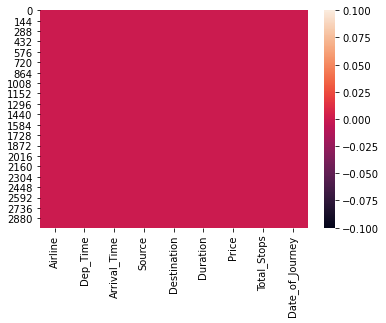

In [7]:
sns.heatmap(df.isnull())

In [8]:
#Lets check the data Types- we can see that almost all the data into object. we have to convert this into integer to further processing
df.dtypes

Airline            object
Dep_Time           object
Arrival_Time       object
Source             object
Destination        object
Duration           object
Price               int64
Total_Stops        object
Date_of_Journey    object
dtype: object

In [9]:
df.describe()

,Price
count,3010.000000
mean,6671.302990
std,3716.154406
min,1779.000000
25%,3913.000000
50%,5943.000000
75%,9125.000000
max,27888.000000


Text(0.5, 1.0, 'Number of flights with different Airlines')

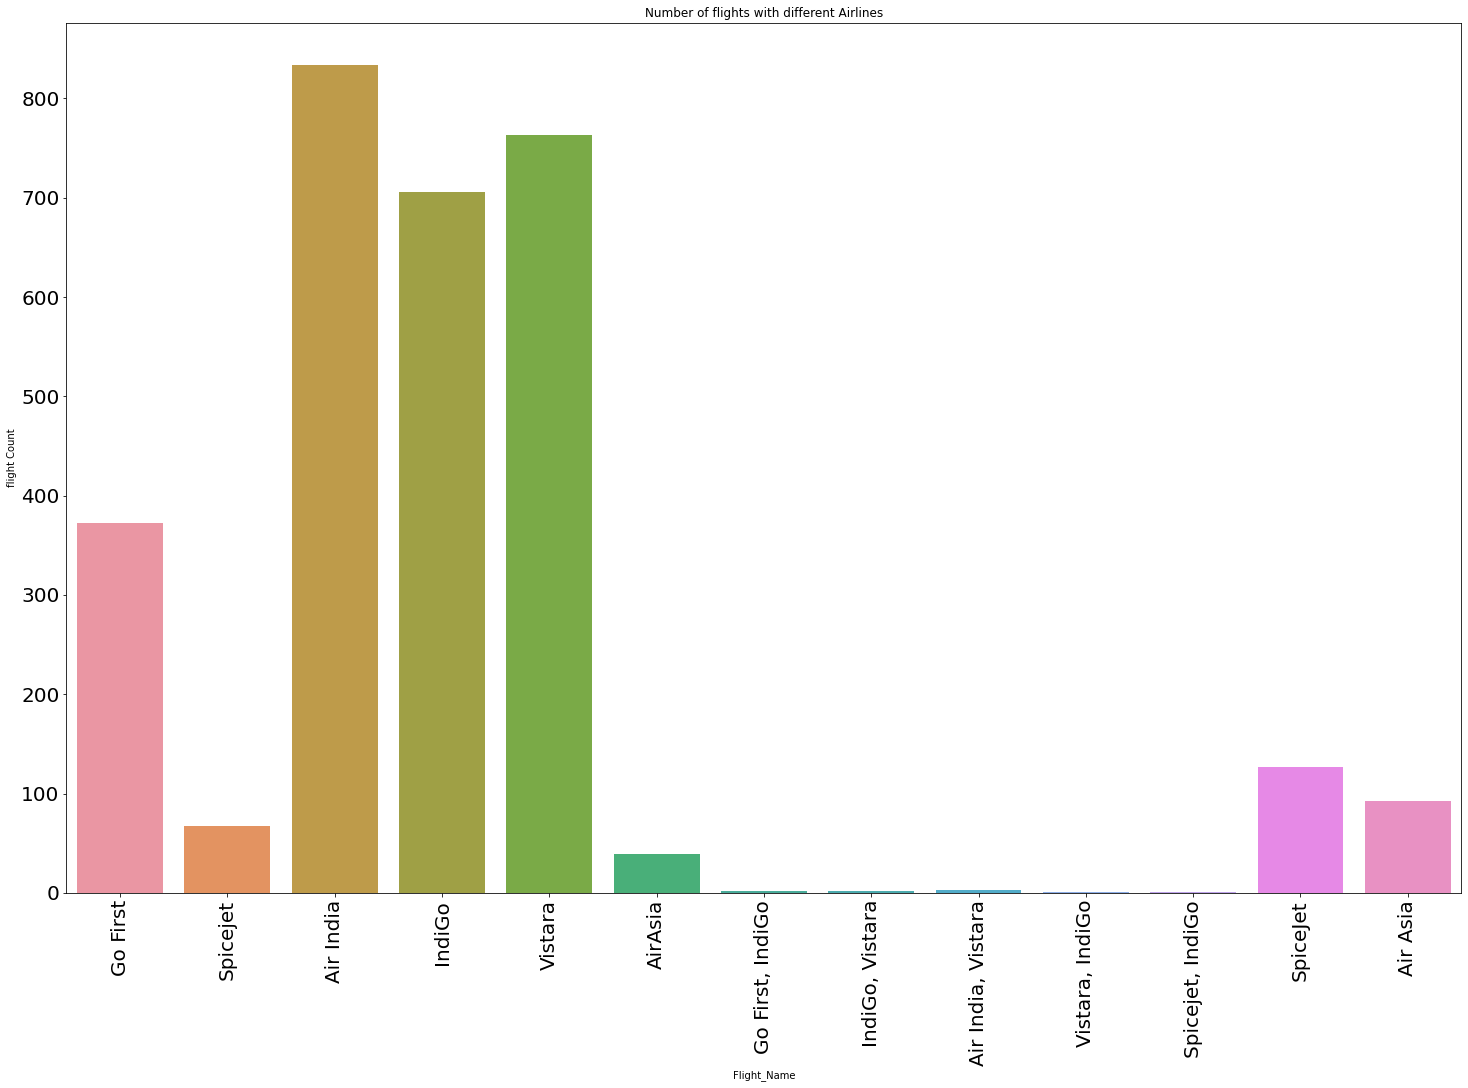

In [10]:
plt.figure(figsize=(25,16))
sns.countplot(x="Airline",data=df)
plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Flight_Name")
plt.ylabel("flight Count")
plt.title('Number of flights with different Airlines')

<AxesSubplot:title={'center':'Price Comparision'}, xlabel='Airline', ylabel='Price'>

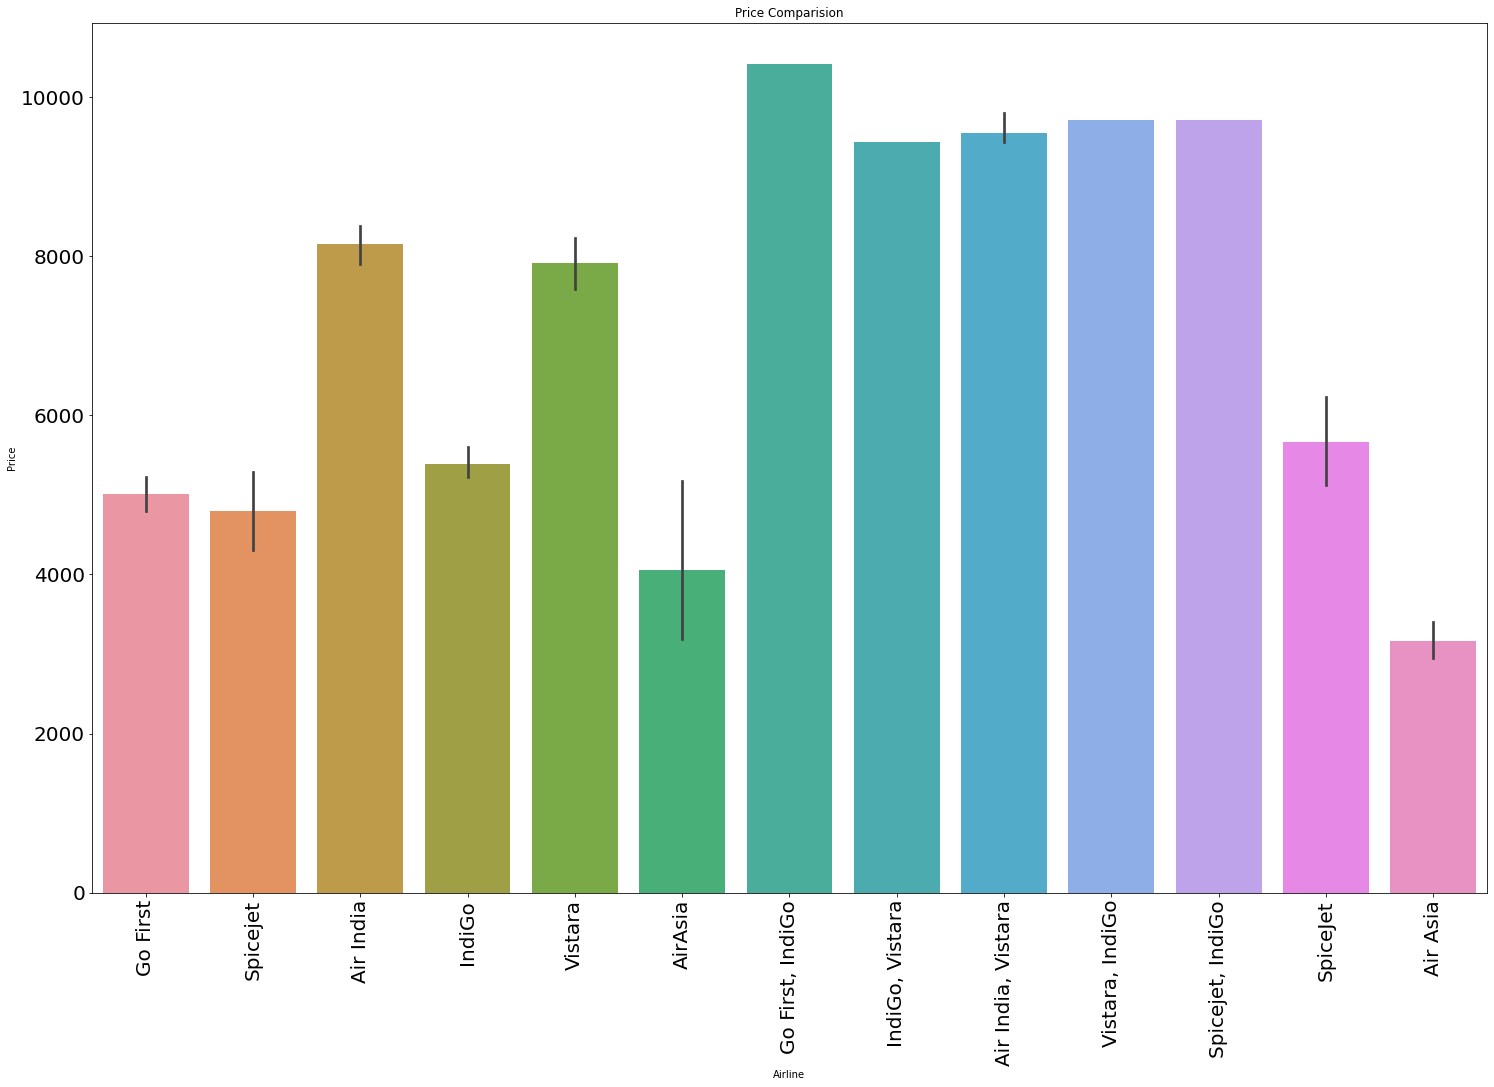

In [11]:
plt.figure(figsize=(25,16))
plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Flight_Name")
plt.ylabel("Price")
plt.title('Price Comparision')
sns.barplot(x="Airline",y="Price",data=df)

Text(0.5, 1.0, 'Number of flights booked for different destination')

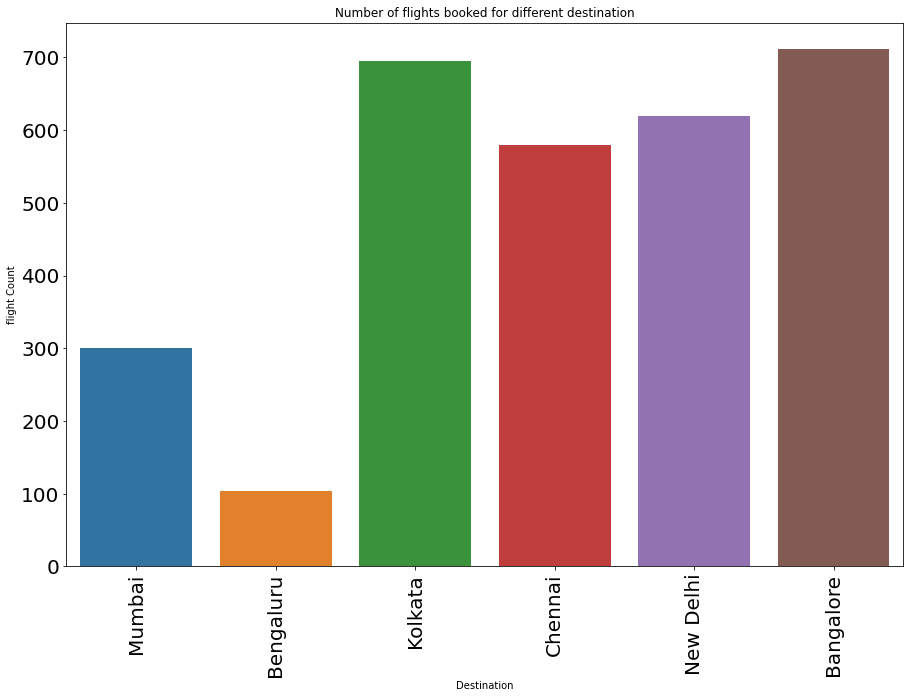

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x="Destination",data=df)
plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Destination")
plt.ylabel("flight Count")
plt.title('Number of flights booked for different destination')

Text(0.5, 1.0, 'Number of flights booked for different destination')

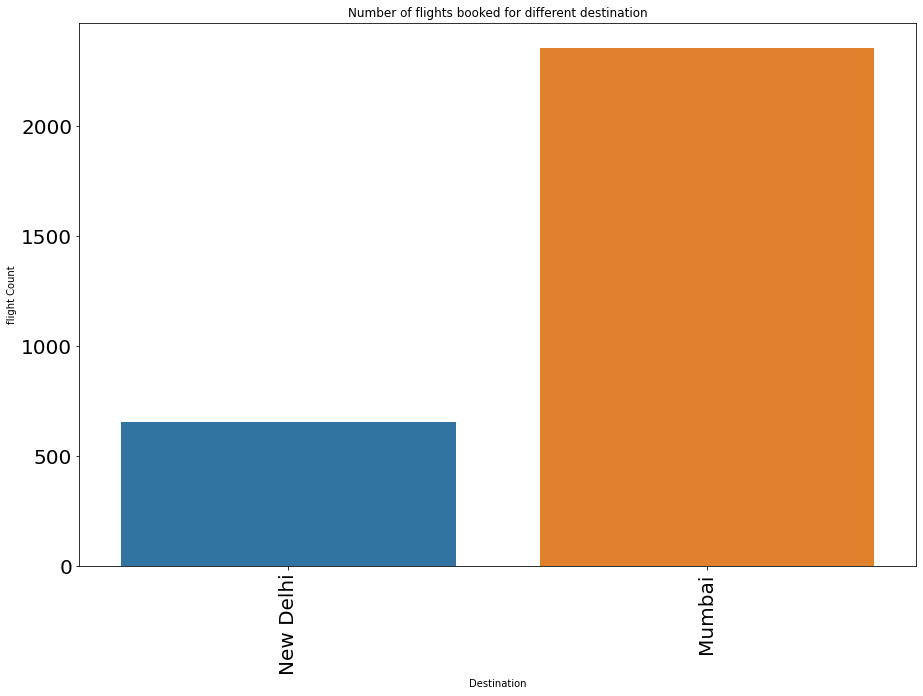

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x="Source",data=df)
plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Destination")
plt.ylabel("flight Count")
plt.title('Number of flights booked for different destination')

Text(0.5, 1.0, 'Number of flights booked for different destination')

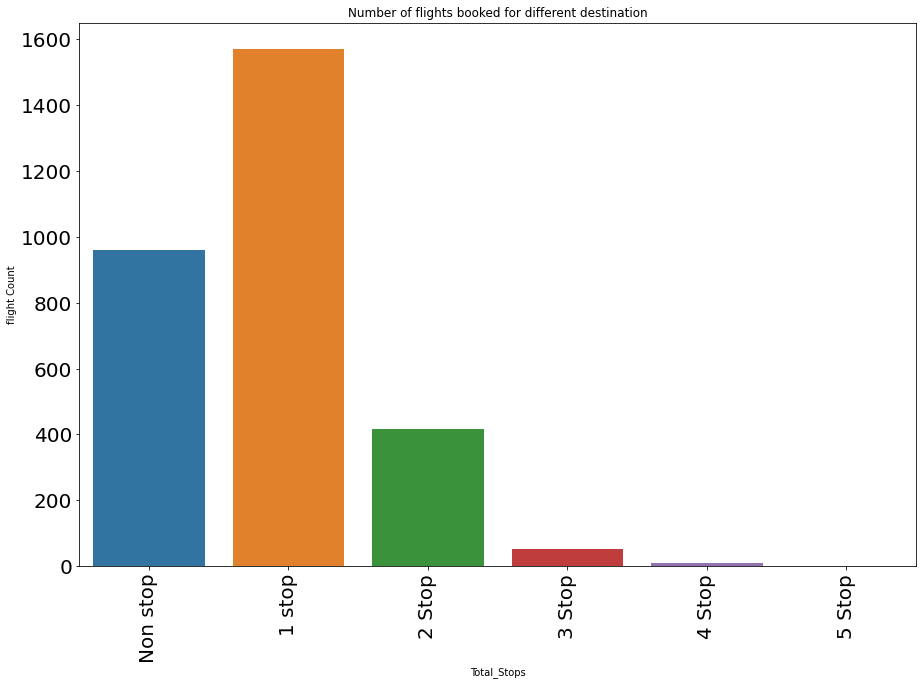

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(x="Total_Stops",data=df)
plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Total_Stops")
plt.ylabel("flight Count")
plt.title('Number of flights booked for different destination')

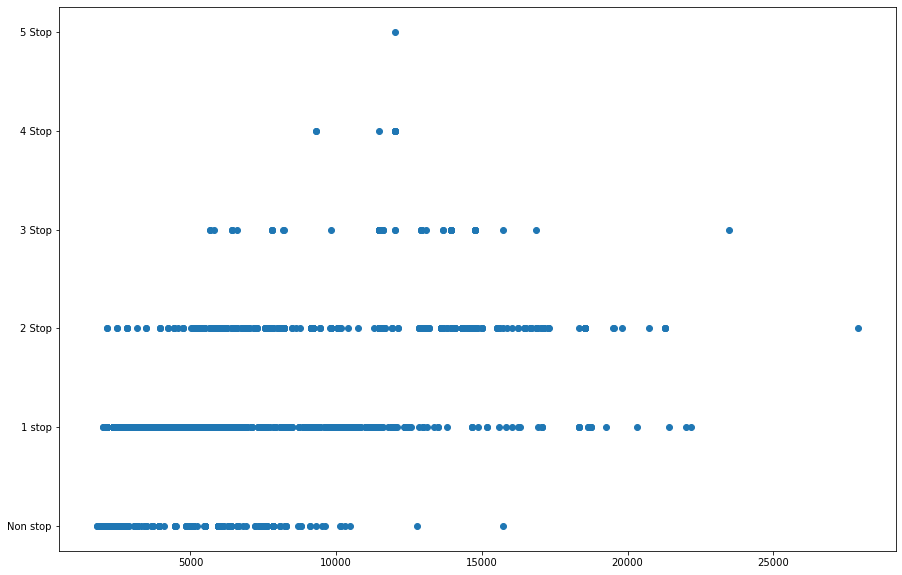

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(df["Price"],df["Total_Stops"])
plt.show()

#Lets convert the object data into integer 

In [16]:
# Duration convert hours in min.
df['Duration']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [17]:
df.head()

,Airline,Dep_Time,Arrival_Time,Source,Destination,Duration,Price,Total_Stops,Date_of_Journey
0,Go First,7:00,9:10,New Delhi,Mumbai,130,5954,Non stop,2/1/2022
1,Go First,8:00,10:10,New Delhi,Mumbai,130,5954,Non stop,2/1/2022
2,Go First,10:30,12:50,New Delhi,Mumbai,140,5954,Non stop,2/1/2022
3,Go First,14:20,16:35,New Delhi,Mumbai,135,5954,Non stop,2/1/2022
4,Go First,15:00,17:15,New Delhi,Mumbai,135,5954,Non stop,2/1/2022


In [18]:
# Date_of_Journey
df["Journey_day"] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df["Journey_month"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [19]:
df.head()

,Airline,Source,Destination,Duration,Price,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Go First,New Delhi,Mumbai,130,5954,Non stop,1,2,7,0,9,10
1,Go First,New Delhi,Mumbai,130,5954,Non stop,1,2,8,0,10,10
2,Go First,New Delhi,Mumbai,140,5954,Non stop,1,2,10,30,12,50
3,Go First,New Delhi,Mumbai,135,5954,Non stop,1,2,14,20,16,35
4,Go First,New Delhi,Mumbai,135,5954,Non stop,1,2,15,0,17,15


Text(0.5, 1.0, 'Number of flights in different month')

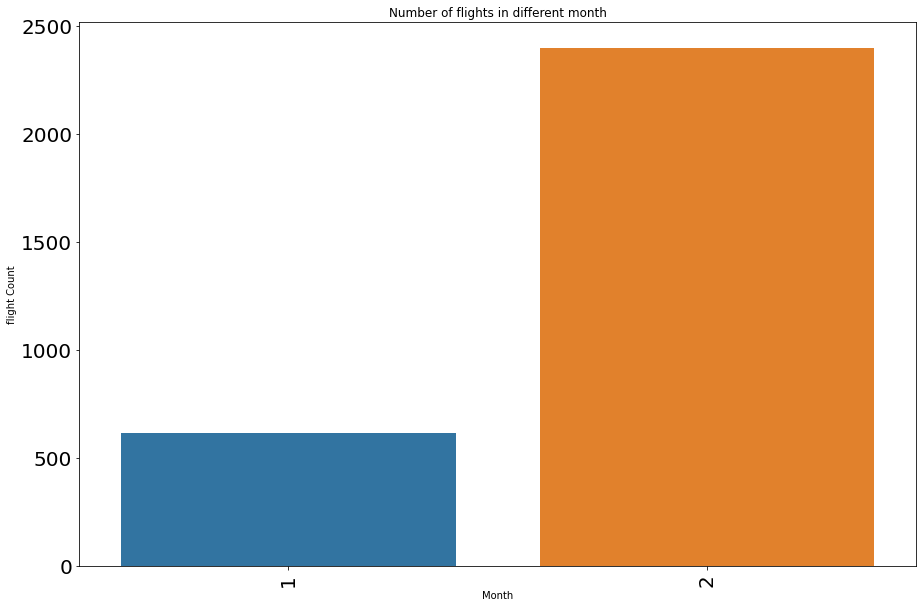

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x="Journey_month",data=df)
plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Month")
plt.ylabel("flight Count")
plt.title('Number of flights in different month')

Text(0.5, 1.0, 'Number of flights in different date')

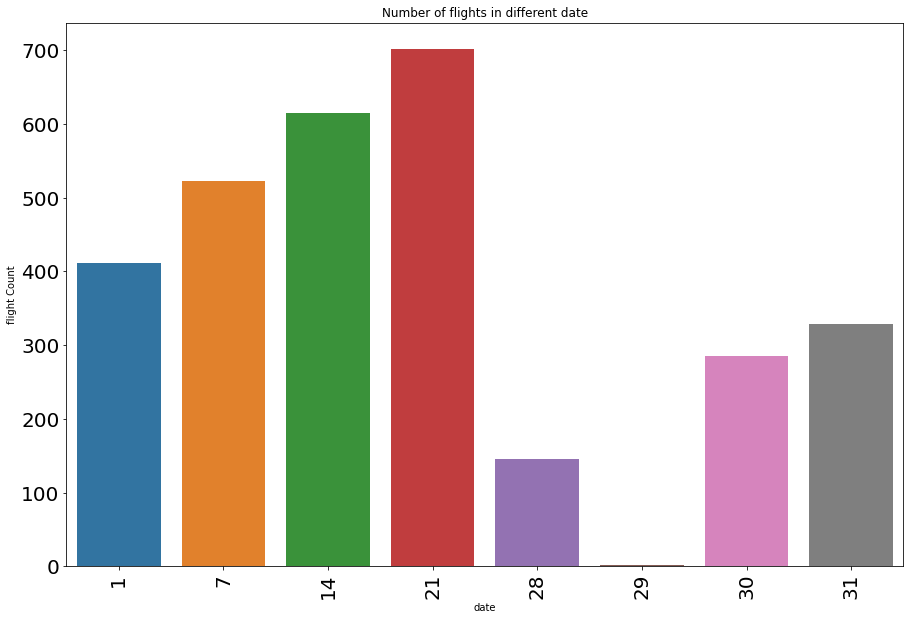

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(x="Journey_day",data=df)
plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("date")
plt.ylabel("flight Count")
plt.title('Number of flights in different date')

array([[<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Journey_day'}>,
        <AxesSubplot:title={'center':'Journey_month'}>],
       [<AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_min'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>,
        <AxesSubplot:title={'center':'Arrival_min'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

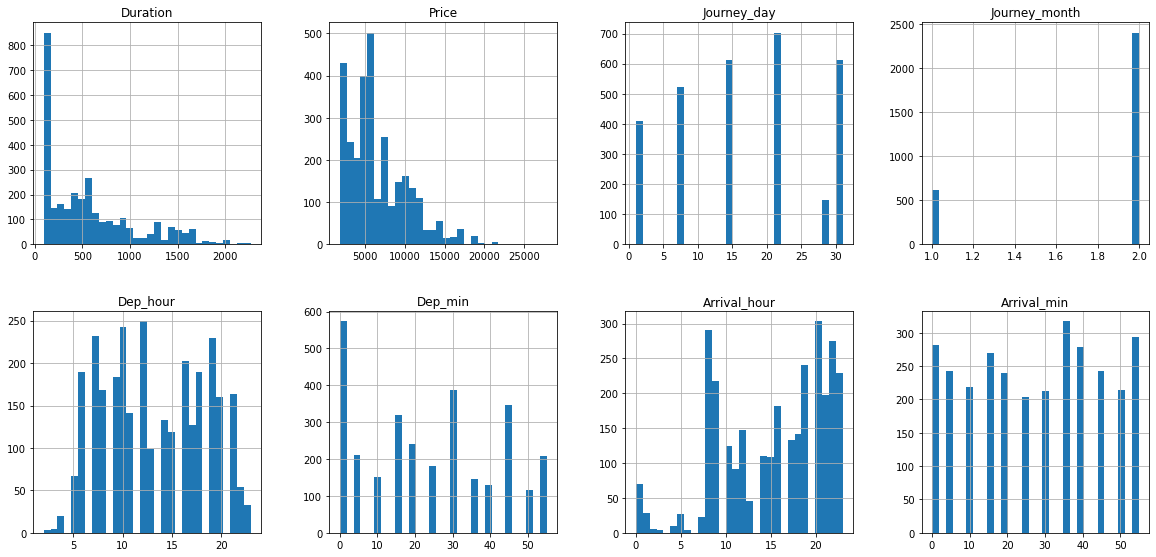

In [22]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Fr

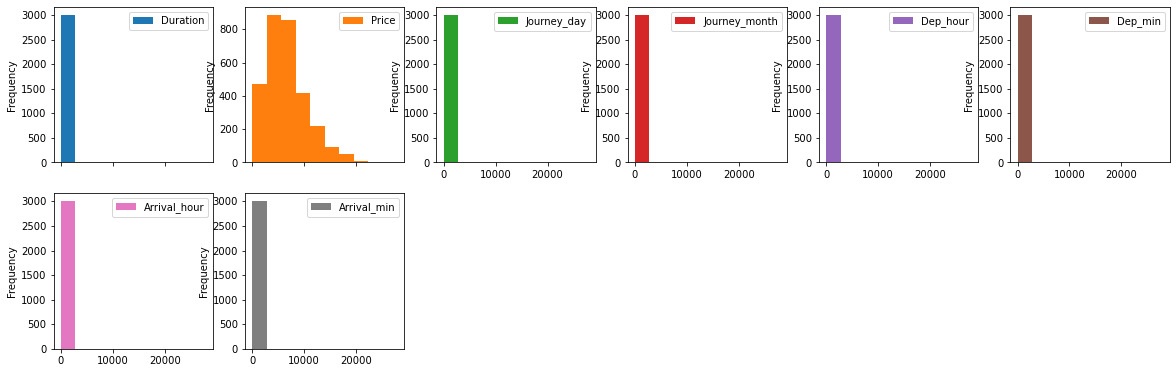

In [23]:
df.plot(kind="hist",subplots=True,layout=(6,6),figsize=(20,20))

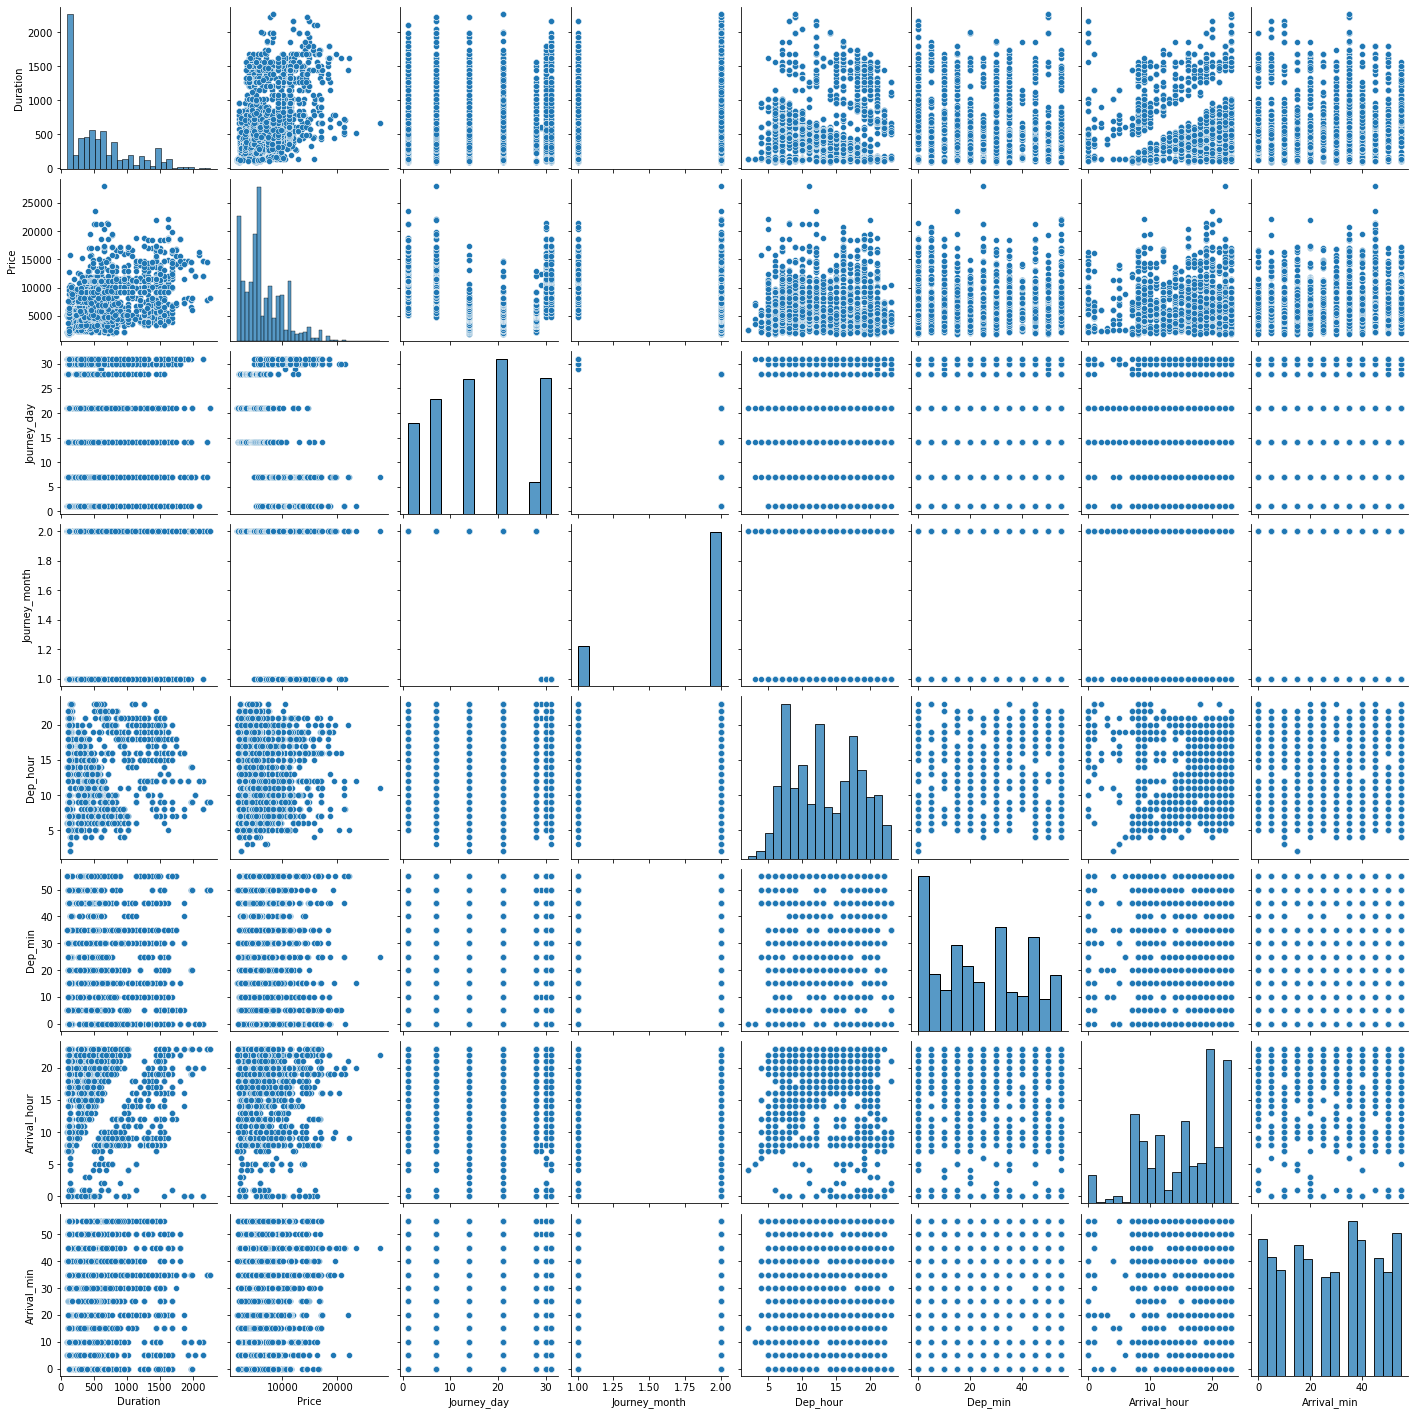

In [24]:
sns.pairplot(df)

In [25]:
#Coverting object data in float/Integer by using label Encoding  
le=LabelEncoder()
df["Airline"]=le.fit_transform(df["Airline"].astype(str))
df["Source"]=le.fit_transform(df["Source"].astype(str))
df["Destination"]=le.fit_transform(df["Destination"].astype(str))
df["Total_Stops"]=le.fit_transform(df["Total_Stops"].astype(str))

<AxesSubplot:>

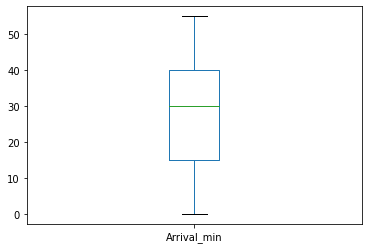

In [26]:
df["Arrival_min"].plot.box()

<AxesSubplot:>

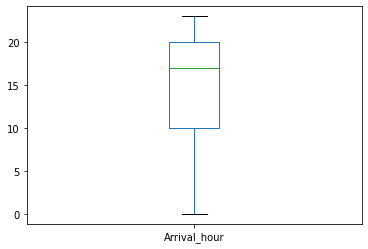

In [27]:
df["Arrival_hour"].plot.box()

<AxesSubplot:>

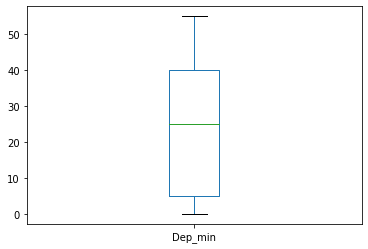

In [28]:
df["Dep_min"].plot.box()

<AxesSubplot:>

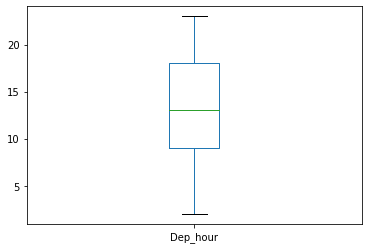

In [29]:
df["Dep_hour"].plot.box()

<AxesSubplot:>

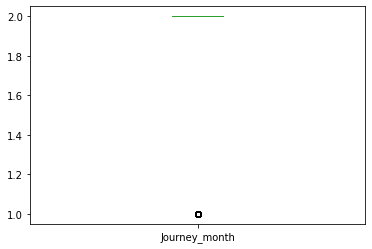

In [30]:
df["Journey_month"].plot.box()

<AxesSubplot:>

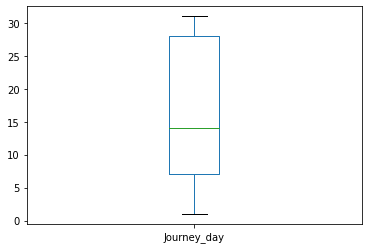

In [31]:
df["Journey_day"].plot.box()

<AxesSubplot:>

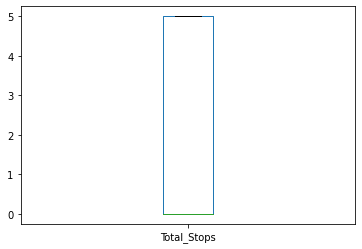

In [32]:
df["Total_Stops"].plot.box()

<AxesSubplot:>

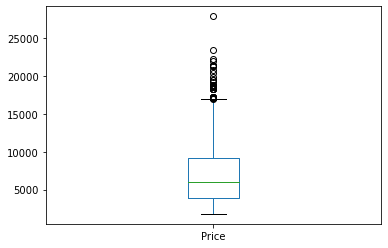

In [33]:
df["Price"].plot.box()

<AxesSubplot:>

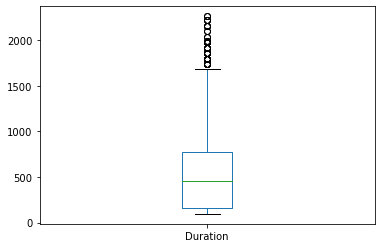

In [34]:
df["Duration"].plot.box()

Airline              AxesSubplot(0.125,0.71587;0.227941x0.16413)
Source            AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Destination       AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Duration            AxesSubplot(0.125,0.518913;0.227941x0.16413)
Price            AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Total_Stops      AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Journey_day         AxesSubplot(0.125,0.321957;0.227941x0.16413)
Journey_month    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Dep_hour         AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Dep_min                AxesSubplot(0.125,0.125;0.227941x0.16413)
Arrival_hour        AxesSubplot(0.398529,0.125;0.227941x0.16413)
Arrival_min         AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

<Figure size 1152x1152 with 0 Axes>

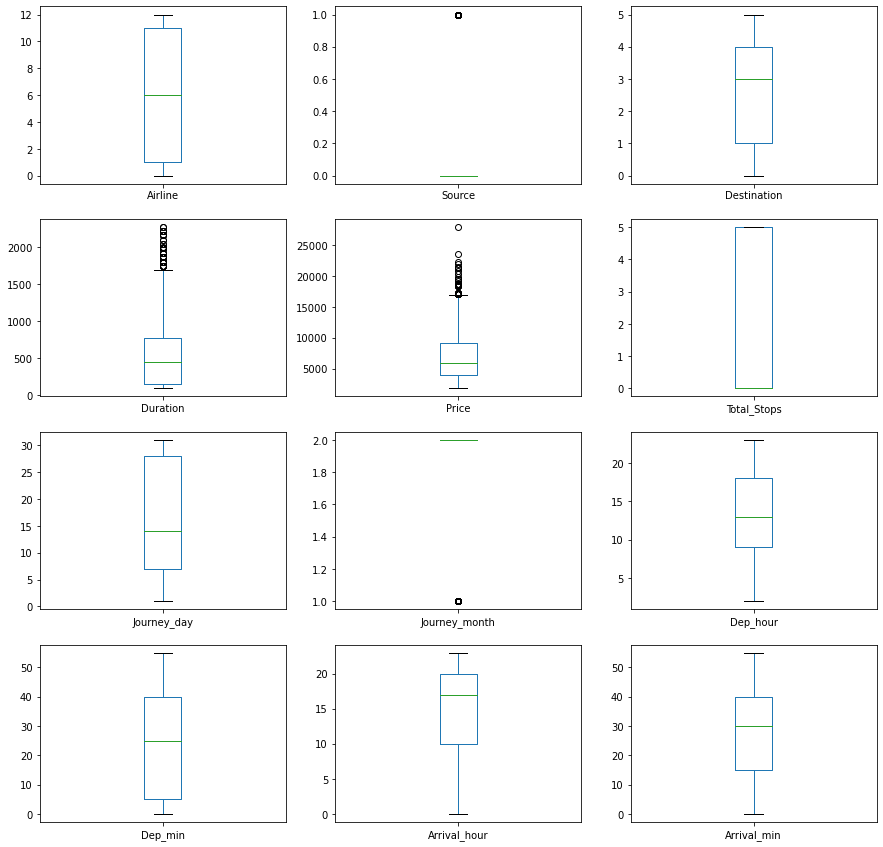

In [35]:
#Checking Outliers
plt.figure(figsize=(16,16))
df.plot(kind="box",subplots=True,layout=(4,3),figsize=(15,15))

In [36]:
df.skew()

Airline          0.170578
Source           1.364736
Destination     -0.113125
Duration         1.089179
Price            1.138244
Total_Stops      0.676883
Journey_day     -0.058591
Journey_month   -1.467392
Dep_hour         0.077186
Dep_min          0.173175
Arrival_hour    -0.593839
Arrival_min     -0.040564
dtype: float64

<AxesSubplot:ylabel='Frequency'>

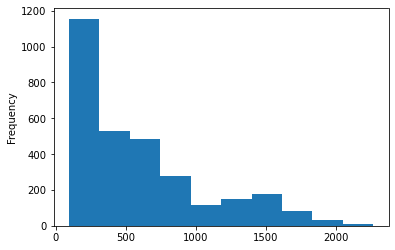

In [37]:
df["Duration"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

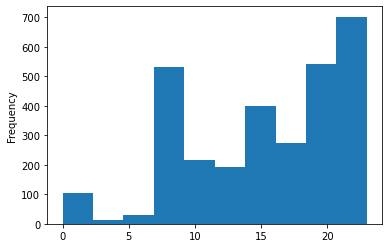

In [38]:
df["Arrival_hour"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

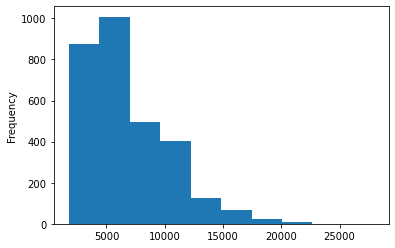

In [39]:
df["Price"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

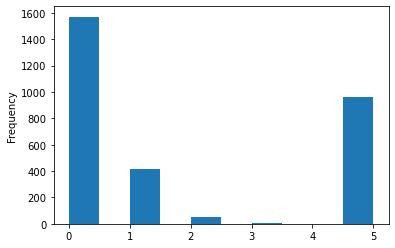

In [40]:
df["Total_Stops"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

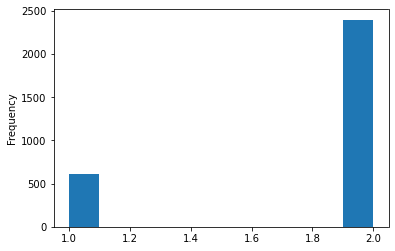

In [41]:
df["Journey_month"].plot.hist()

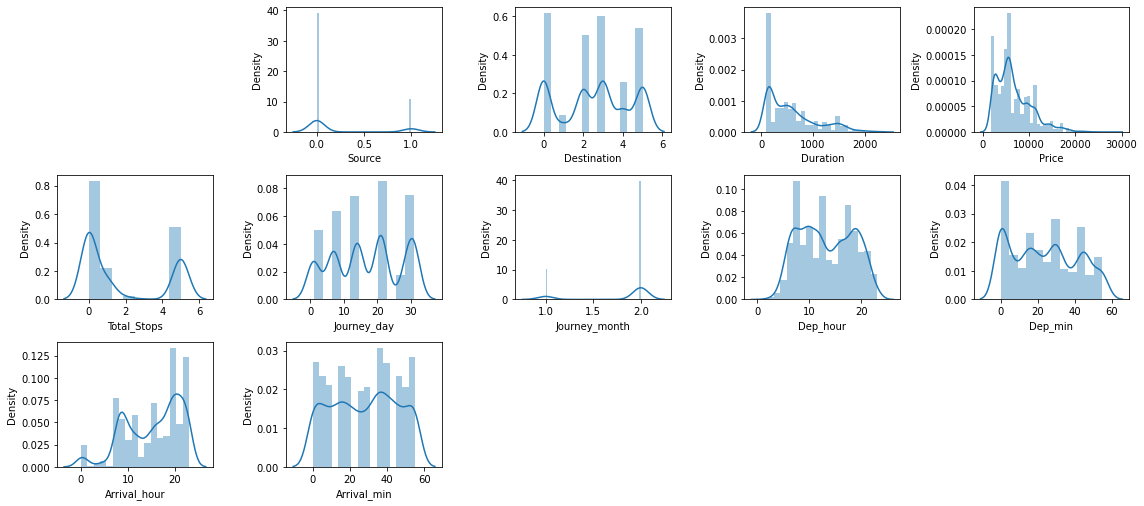

In [42]:
collist=df.columns.values
ncol=5
nrows=7
plt.figure(figsize=(16,16))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

In [43]:
import numpy as np
skew=df.columns.values
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [44]:
df.skew()

Airline          0.170578
Source           1.364736
Destination     -0.113125
Duration        -0.019034
Price           -0.067850
Total_Stops      0.499180
Journey_day     -0.058591
Journey_month   -1.467392
Dep_hour         0.077186
Dep_min          0.173175
Arrival_hour    -0.593839
Arrival_min     -0.040564
dtype: float64

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([], dtype=int64), array([], dtype=int64))


In [46]:
df

,Airline,Source,Destination,Duration,Price,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,0.693147,4,4.875197,8.691986,1.791759,1,2,7,0,9,10
1,4,0.693147,4,4.875197,8.691986,1.791759,1,2,8,0,10,10
2,4,0.693147,4,4.948760,8.691986,1.791759,1,2,10,30,12,50
3,4,0.693147,4,4.912655,8.691986,1.791759,1,2,14,20,16,35
4,4,0.693147,4,4.912655,8.691986,1.791759,1,2,15,0,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...
3005,1,0.000000,2,7.725771,9.013595,0.693147,21,2,9,50,23,35
3006,1,0.000000,2,6.552508,9.152181,0.693147,21,2,8,0,19,40
3007,1,0.000000,2,6.634633,9.152181,0.693147,21,2,7,0,19,40
3008,1,0.000000,2,6.716595,9.212239,0.693147,21,2,20,55,10,40


In [47]:
y=df.iloc[:,4]
y

0       8.691986
1       8.691986
2       8.691986
3       8.691986
4       8.691986
          ...   
3005    9.013595
3006    9.152181
3007    9.152181
3008    9.212239
3009    9.584177
Name: Price, Length: 3010, dtype: float64

In [48]:
df.drop("Price",axis=1,inplace=True)

In [49]:
y

0       8.691986
1       8.691986
2       8.691986
3       8.691986
4       8.691986
          ...   
3005    9.013595
3006    9.152181
3007    9.152181
3008    9.212239
3009    9.584177
Name: Price, Length: 3010, dtype: float64

In [50]:
x=df

In [51]:
x.shape

(3010, 11)

In [52]:
y.shape

(3010,)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [54]:
x_train.shape

(2016, 11)

In [55]:
x_test.shape

(994, 11)

In [56]:
y_train.shape,y_test.shape

((2016,), (994,))

Feature: 0, Score: 0.00000
Feature: 1, Score: 10.30192
Feature: 2, Score: 7.18075
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 32.12552
Feature: 8, Score: 9.42760
Feature: 9, Score: 58.28694


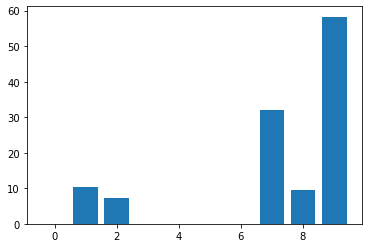

In [57]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)
model = LinearRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [58]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'fit_intercept': [True],
    'normalize': [False],
    'copy_X': [True],
    'positive': [False]
}
# Create a based model
lm=LinearRegression()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lm, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False}

In [59]:
def evaluate(lm, x_test, y_test):
    predictions = lm.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
        
    return accuracy

base_model = LinearRegression()
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)
grid_search.best_params_
{'fit_intercept': [True],
'normalize': [False],
'copy_X': [True],
'positive': [False]}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test,y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.2346 degrees.
Accuracy = 97.26%.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Model Performance
Average Error: 0.2346 degrees.
Accuracy = 97.26%.
Improvement of 0.00%.


In [60]:
lm=LinearRegression(fit_intercept= True, normalize=False,copy_X=True,positive=False)

In [61]:
lm.fit(x_train,y_train)

LinearRegression(normalize=False)

In [62]:
lm.coef_

array([ 1.20333903e-02, -1.03485652e-01, -1.89738213e-02,  3.46031479e-01,
        7.67731043e-02, -4.07834848e-02, -1.18055520e+00, -7.22984406e-03,
       -7.90924185e-04,  5.01571107e-03,  9.27653912e-04])

In [63]:
lm.score(x_train,y_train)

0.7141900223594932

In [64]:
pred=lm.predict(x_test)
print("predict result price",pred)
print("actual price",y_test)

predict result price [8.92047413 8.73548382 8.7302787  8.82716346 9.47742431 9.26026062
 8.94871215 7.86099793 8.39514291 8.68422245 8.78273053 8.1656772
 8.78881931 9.43956943 8.39429465 9.42074331 8.72952538 8.57990493
 8.9966689  8.37302696 8.16377268 8.09343068 8.75877867 9.42705785
 8.62319134 8.2314119  8.70230064 8.86326499 9.01591727 9.1718836
 8.29323553 8.11853607 8.81280668 8.01647859 8.69354905 8.88332731
 8.18942486 8.95908281 7.87083473 8.98410618 8.72484533 8.72747032
 8.36193008 8.58508037 9.0147485  7.85197821 7.92326571 8.31279725
 9.02128762 8.28482731 8.94892611 8.76241168 7.86009527 8.67576497
 8.11855987 8.66548204 9.08681914 8.26673776 9.09919589 7.72105094
 9.16644096 8.67583501 8.47225698 8.61409731 8.66445133 8.98094734
 8.48961344 8.54032143 8.19842057 8.73172226 7.89306588 9.40238069
 8.46189068 8.86960119 8.30196299 8.75902423 8.46594995 8.87303083
 8.3349856  8.81801806 9.04722505 8.3417414  8.45939548 8.6593513
 8.73237064 8.73195621 8.65934303 9.26512647

In [65]:
print("error:")

print("mean absolute error:",mean_absolute_error(y_test,pred))
print("men squared error:",mean_squared_error(y_test,pred))
print("root mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.2345501319825278
men squared error: 0.09299816870725815
root mean squared error: 0.3049560111020246


In [66]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6957715200516775


0.714188587121646
[ 1.20260718e-02 -1.01486212e-01 -1.89336275e-02  3.45772835e-01
  7.60228378e-02 -4.07467882e-02 -1.17920651e+00 -7.20812556e-03
 -7.95374000e-04  5.00741012e-03  9.27651376e-04]


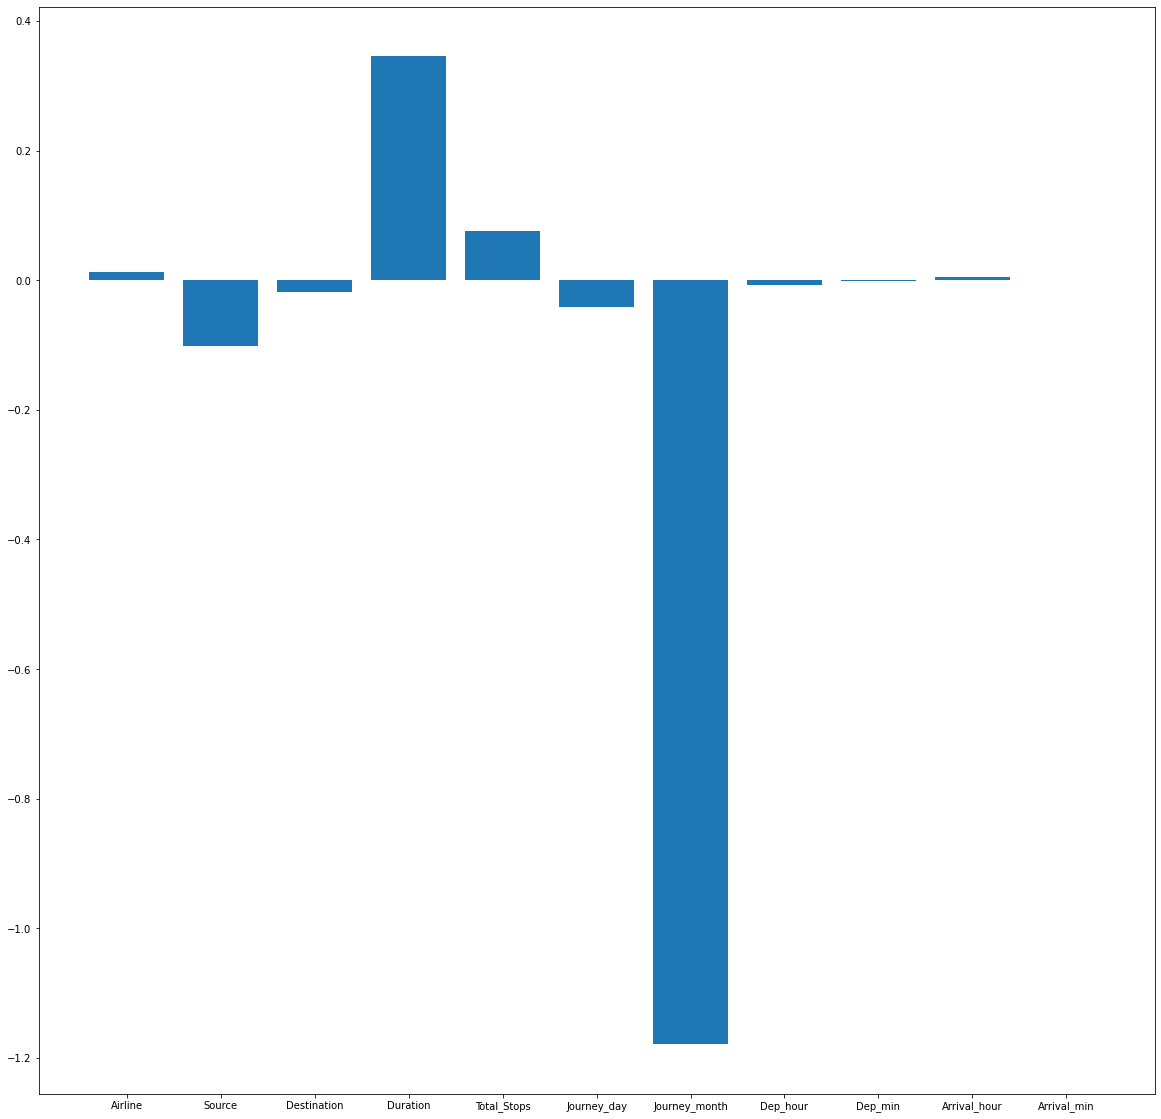

In [67]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print(ls.coef_)
plt.figure(figsize=(20,20))
plt.bar(x_train.columns,ls.coef_)
plt.show()

0.7141892072452711
[ 1.20311404e-02 -1.02322262e-01 -1.89374657e-02  3.45914754e-01
  7.63651591e-02 -4.07443237e-02 -1.17913430e+00 -7.21375317e-03
 -7.93849782e-04  5.01003891e-03  9.28069069e-04]


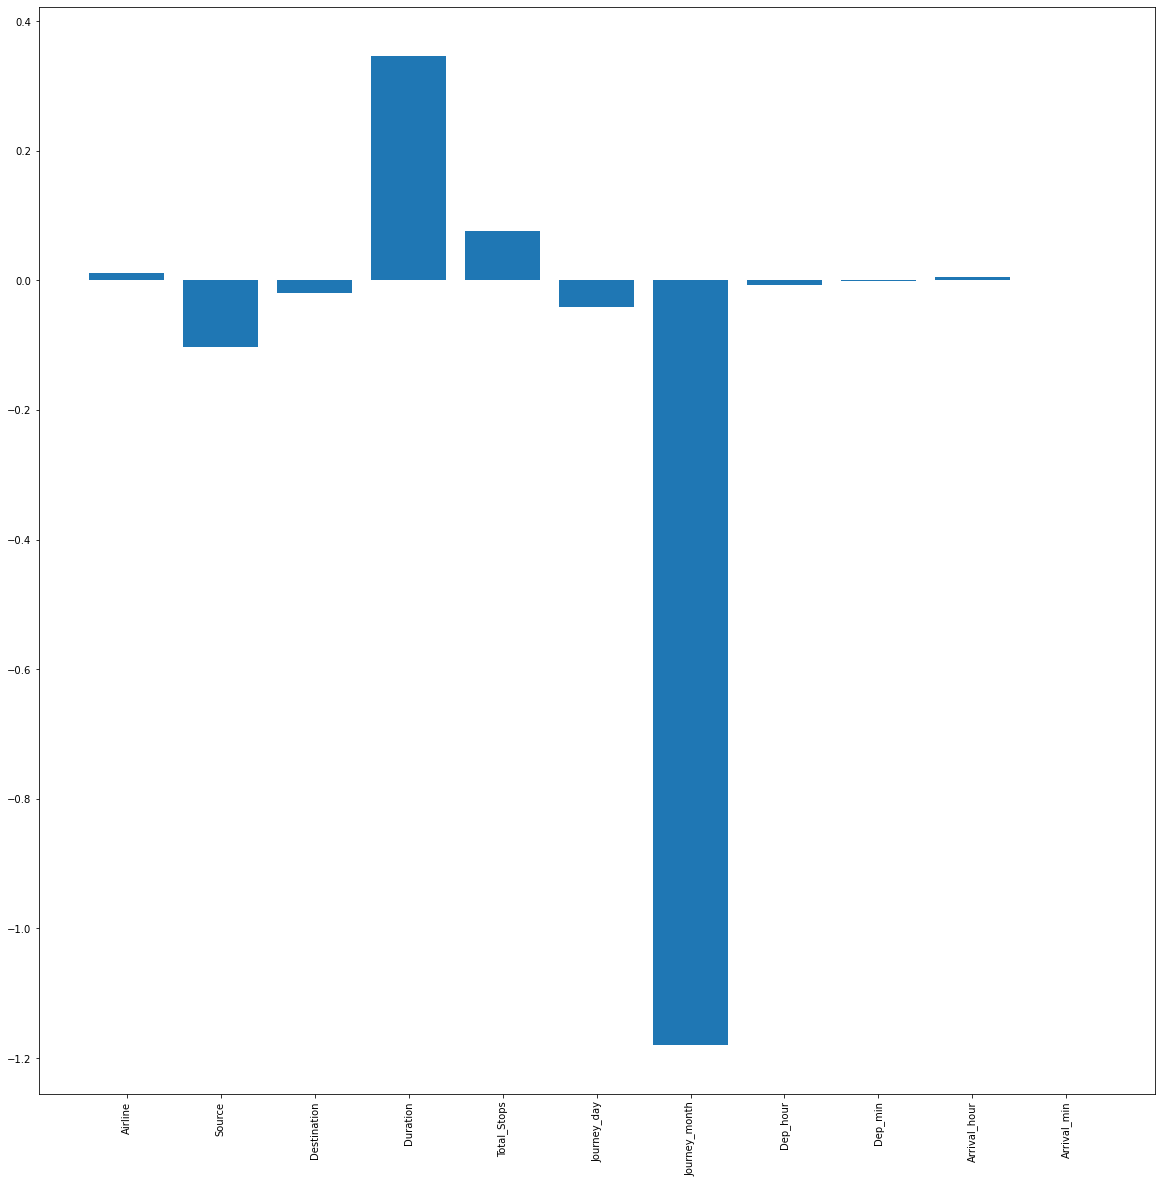

In [68]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
print(enr.coef_)
plt.figure(figsize=(20,20))
plt.bar(x_train.columns,enr.coef_)
plt.xticks(rotation=90)
plt.show()

In [69]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.7130225548038004
0.6505215725223542
0.6984546552361034


In [70]:
from sklearn.svm import SVR
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.svm import SVR

Feature: 0, Score: 0.00244
Feature: 1, Score: 0.02168
Feature: 2, Score: 0.00592
Feature: 3, Score: 0.00221
Feature: 4, Score: 0.00196
Feature: 5, Score: 0.00403
Feature: 6, Score: 0.00358
Feature: 7, Score: 0.22086
Feature: 8, Score: 0.01008
Feature: 9, Score: 0.72722


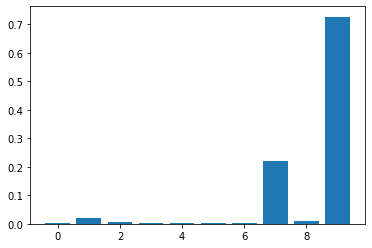

In [72]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [73]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'min_samples_split': [2,4,6,8,10,12],
    'min_samples_leaf': [1,2,3,4,5],
    'max_features':['auto', 'sqrt', 'log2']
}
# Create a based model
dtc=DecisionTreeRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dtc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


{'criterion': 'squared_error',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'}

In [74]:
def evaluate(dtc, x_test, y_test):
    predictions = dtc.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
        
    return accuracy

base_model = DecisionTreeRegressor()
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)
grid_search.best_params_
{'criterion': 'friedman_mse',
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'splitter': 'random'}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test,y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0902 degrees.
Accuracy = 98.97%.
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Model Performance
Average Error: 0.1038 degrees.
Accuracy = 98.81%.
Improvement of -0.16%.


In [75]:
dtc=DecisionTreeRegressor(criterion='friedman_mse',max_features='auto', min_samples_leaf= 4,min_samples_split=12,splitter='random')
dtc.fit(x_train,y_train)
print("DTC SCORE:",dtc.score(x_train,y_train))

dtcpredict=dtc.predict(x_test)
print("dtc r2_score:",r2_score(y_test,dtcpredict))
print("mean squared error of DTC:",mean_squared_error(y_test,dtcpredict))
print("root mean squared error of DTC:",np.sqrt(mean_squared_error(y_test,dtcpredict)))

DTC SCORE: 0.9256852125037507
dtc r2_score: 0.865421651416692
mean squared error of DTC: 0.04113862044743678
root mean squared error of DTC: 0.20282657727092074


Feature: 0, Score: 43.71468
Feature: 1, Score: 166.23271
Feature: 2, Score: 94.62142
Feature: 3, Score: 35.91517
Feature: 4, Score: 22.57123
Feature: 5, Score: 42.40241
Feature: 6, Score: 46.04690
Feature: 7, Score: 1037.14627
Feature: 8, Score: 134.03964
Feature: 9, Score: 3899.09514


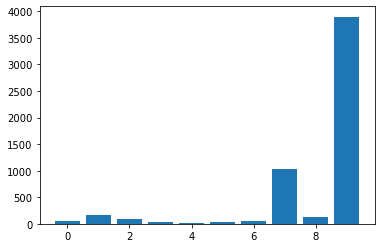

In [76]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(x, y)
# perform permutation importance
results = permutation_importance(model, x, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [77]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print("KNR SCORE:",knr.score(x_train,y_train))

knrpredict=knr.predict(x_test)
print("knr r2_score:",r2_score(y_test,knrpredict))
print("mean squared error of KNN:",mean_squared_error(y_test,knrpredict))
print("root mean squared error of KNN:",np.sqrt(mean_squared_error(y_test,knrpredict)))

KNR SCORE: 0.7716182604810504
knr r2_score: 0.6004758145101814
mean squared error of KNN: 0.12212866333593539
root mean squared error of KNN: 0.349469116426524


In [78]:
svr1=SVR()
svr1.fit(x_train,y_train)
print("SVR1 SCORE:",svr1.score(x_train,y_train))

svr1predict=svr1.predict(x_test)
print("SVR r2_score:",r2_score(y_test,svr1predict))
print("mean squared error of SVR:",mean_squared_error(y_test,svr1predict))
print("root mean squared error of SVR:",np.sqrt(mean_squared_error(y_test,svr1predict)))

SVR1 SCORE: 0.6984546552361034
SVR r2_score: 0.6634274299480529
mean squared error of SVR: 0.10288528101393825
root mean squared error of SVR: 0.3207573553543835


Feature: 0, Score: 0.00324
Feature: 1, Score: 0.01501
Feature: 2, Score: 0.00648
Feature: 3, Score: 0.00282
Feature: 4, Score: 0.00317
Feature: 5, Score: 0.00341
Feature: 6, Score: 0.00356
Feature: 7, Score: 0.20573
Feature: 8, Score: 0.01165
Feature: 9, Score: 0.74494


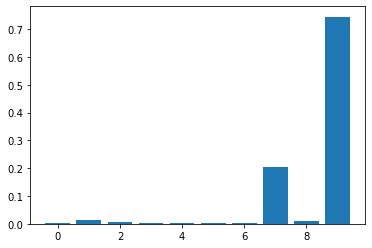

In [79]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [80]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [81]:
def evaluate(rf, x_test, y_test):
    predictions = rf.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
        
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test,y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0999 degrees.
Accuracy = 98.85%.
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Model Performance
Average Error: 0.1208 degrees.
Accuracy = 98.60%.
Improvement of -0.25%.


In [82]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,random_state=42,bootstrap=True,max_depth=100,max_features=3,min_samples_leaf=3,min_samples_split=8) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predrf))
print("mean squared error of RF:",mean_squared_error(y_test,predrf))
print("root mean squared error of RF:",np.sqrt(mean_squared_error(y_test,predrf)))

rf score: 0.9443135358970738
rf r2 score: 0.8859710837814994
mean squared error of RF: 0.0348569614185866
root mean squared error of RF: 0.186700191265533


In [83]:
from sklearn.ensemble import AdaBoostRegressor
#AdaBoostRegressor(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostRegressor(n_estimators=50,random_state=42)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("ABR score:",ad.score(x_train,y_train))
print("ABR r2 score:",r2_score(y_test,predad))
print("mean squared error of ABR:",mean_squared_error(y_test,predad))
print("root mean squared error of ABR:",np.sqrt(mean_squared_error(y_test,predad)))

ABR score: 0.7878809028768924
ABR r2 score: 0.7556157974592288
mean squared error of ABR: 0.07470465388755165
root mean squared error of ABR: 0.2733215210837808


In [84]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("GBR score:",gb.score(x_train,y_train))
print("GBR r2 score:",r2_score(y_test,predgb))
print("mean squared error of GBR:",mean_squared_error(y_test,predad))
print("root mean squared error of GBR:",np.sqrt(mean_squared_error(y_test,predad)))

GBR score: 0.9048182722462573
GBR r2 score: 0.8678940476420735
mean squared error of GBR: 0.07470465388755165
root mean squared error of GBR: 0.2733215210837808


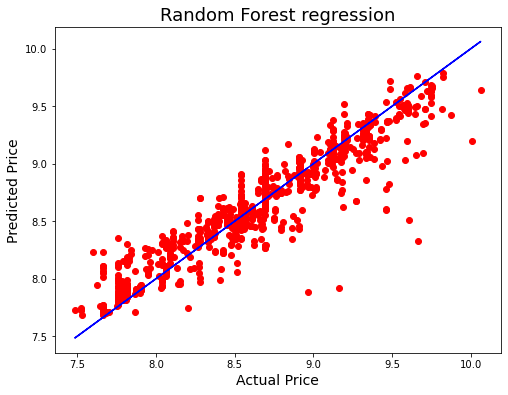

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predrf, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Random Forest regression',fontsize=18)
plt.show()